## Imports

In [1]:
import numpy as np 
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

np.random.seed(42)

In [2]:
cust_df = pd.read_csv("./Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
# Encode the address column as numeric values
encoder = LabelEncoder()
cust_df["Address"] = encoder.fit_transform(cust_df["Address"])

# Extract the age, education level, and years employed columns
age = cust_df["Age"].values.reshape(-1, 1)
edu = cust_df["Edu"].values.reshape(-1, 1)
years_employed = cust_df["Years Employed"].values.reshape(-1, 1)

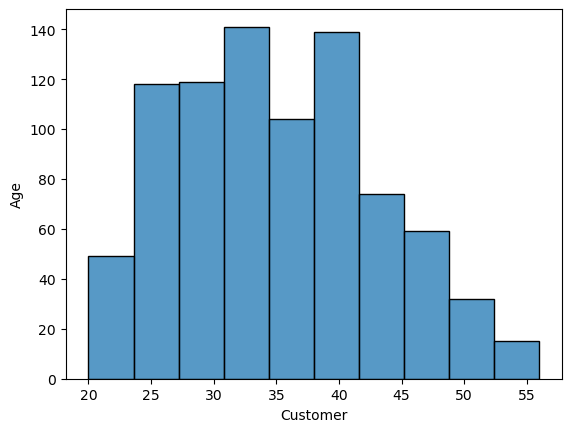

In [4]:
# Create a scatter plot of age
sns.histplot(data=cust_df, x="Age", bins=10)
plt.xlabel("Customer")
plt.ylabel("Age")
plt.show()

In [5]:
cust_df.Age.describe()

count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64

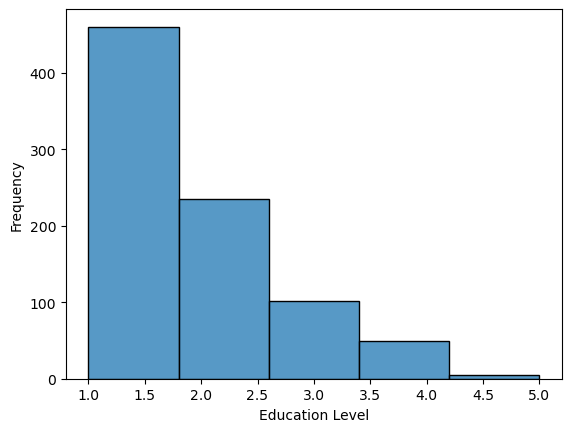

In [8]:
# Create a histogram of education level
sns.histplot(data=cust_df, x="Edu", bins=5)
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()

In [7]:
cust_df['Edu'].describe()

count    850.000000
mean       1.710588
std        0.927784
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Edu, dtype: float64

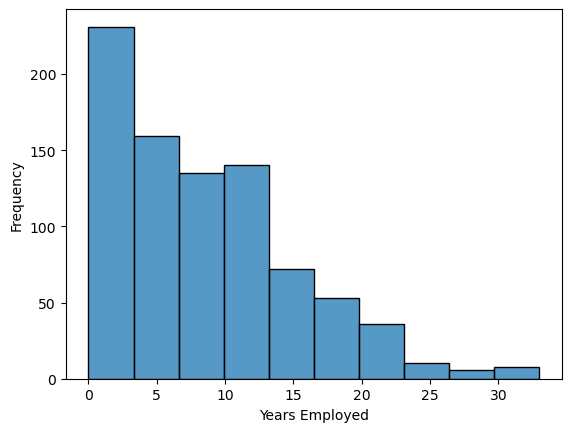

In [10]:
# Create a histogram of years employed
sns.histplot(data=cust_df, x="Years Employed", bins=10)
plt.xlabel("Years Employed")
plt.ylabel("Frequency")
plt.show()

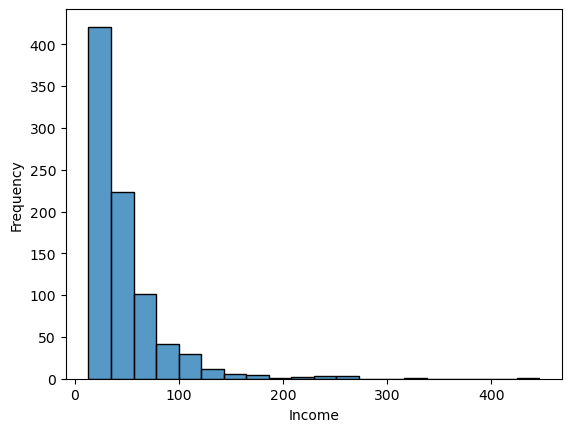

In [14]:
# Create a histogram of income 
sns.histplot(data=cust_df, x="Income", bins=20)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

In [13]:
cust_df['Income'].describe()

count    850.000000
mean      46.675294
std       38.543054
min       13.000000
25%       24.000000
50%       35.000000
75%       55.750000
max      446.000000
Name: Income, dtype: float64

The regression line can help us see the overall trend in the data and how education level might impact the number of years employed. If the regression line has a positive slope, it means that higher education levels are associated with longer years employed. Conversely, if the slope is negative, it means that higher education levels are associated with shorter years employed. If there is no slope, it means that education level does not have an impact on the number of years employed.

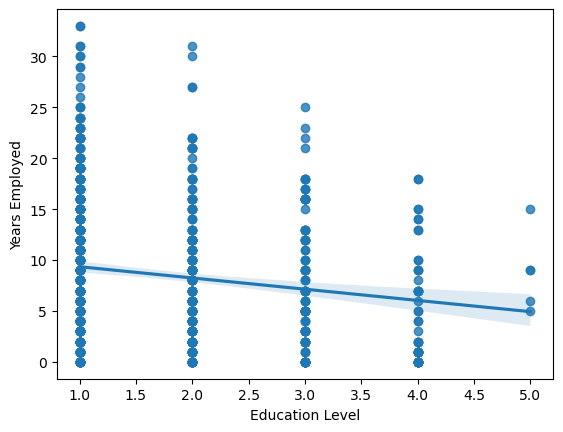

In [9]:
# Create a scatter plot of education level against years employed with a regression line
sns.regplot(data=cust_df, x="Edu", y="Years Employed")
plt.xlabel("Education Level")
plt.ylabel("Years Employed")
plt.show()

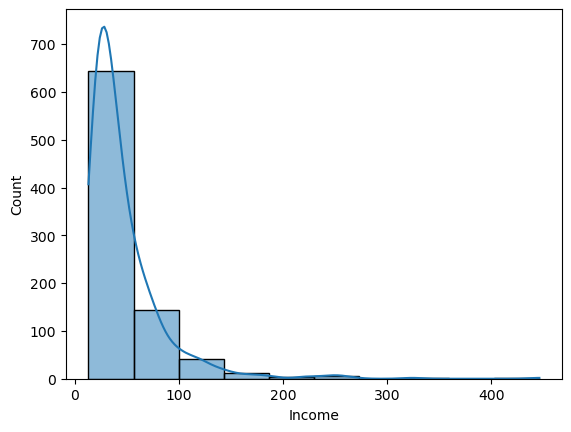

In [15]:
# Create a histogram of income distribution
sns.histplot(data=cust_df, x="Income", bins=10, kde=True)
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

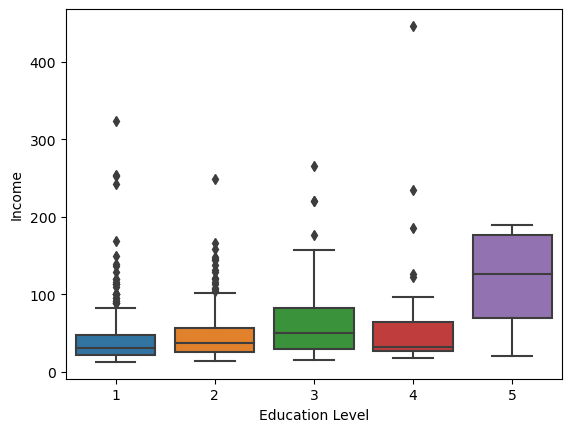

In [16]:
# Create a box plot of income distribution by education level
sns.boxplot(data=cust_df, x="Edu", y="Income")
plt.xlabel("Education Level")
plt.ylabel("Income")
plt.show()

We specify the data and the columns to plot using the data and x parameters. We also specify the number of bins using the bins parameter and add a kernel density estimation (KDE) line to the plot using the kde parameter. We add x-labels and y-labels to the plot using the plt.xlabel and plt.ylabel functions, and finally, display the plot using the plt.show function.

Next, we create a scatter plot of the debt-to-income ratio versus income using the sns.scatterplot function. We specify the data and the columns to plot using the data and x, y parameters. We add x-labels and y-labels to the plot using the plt.xlabel and plt.ylabel functions, and finally, display the plot using the plt.show function.

The resulting plots will show us the debt distribution, debt-to-income ratio, and income levels of the customers. We can examine if there are any noticeable debt patterns or groups, such as whether customers with high income levels tend to have higher debt-to-income ratios, or whether customers with higher levels of education tend to have lower levels of debt. If there are distinct groups or patterns, we can investigate further to see if there are any underlying factors or correlations.

In [ ]:
# Create a histogram of card debt distribution
sns.histplot(data=cust_df, x="Card Debt", bins=10, kde=True)
plt.xlabel("Card Debt")
plt.ylabel("Count")
plt.show()

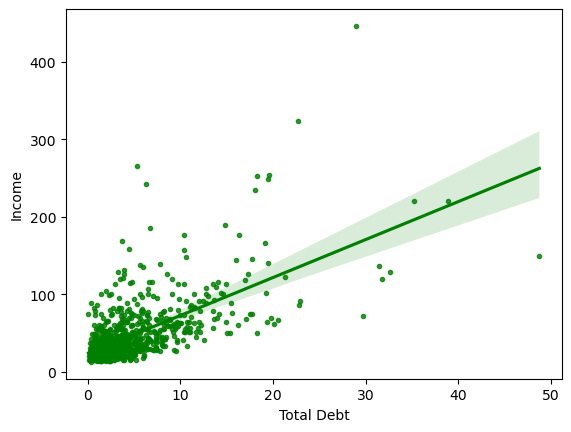

In [24]:
# Create a scatter plot of total debt ratio versus income
cust_df['Total Debt'] = cust_df['Other Debt'] + cust_df['Card Debt']
sns.regplot(data=cust_df, x="Total Debt", y="Income", marker='.', color='g')
plt.xlabel("Total Debt")
plt.ylabel("Income")
plt.show()

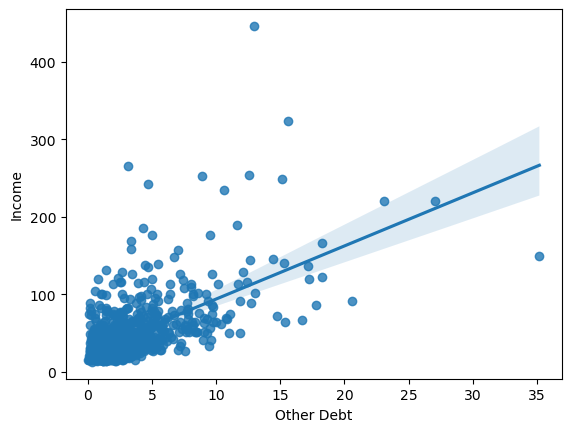

In [19]:
# Create a histogram of other debt distribution
sns.regplot(data=cust_df, x="Other Debt", y="Income")
plt.xlabel("Other Debt")
plt.ylabel("Income")
plt.show()

The resulting plots will show us the correlations between different attributes. We can examine if there are any positive or negative correlations, such as whether older customers tend to have higher income levels, or whether customers with higher levels of education tend to have lower debt-to-income ratios. If there are distinct correlations, we can investigate further to see if there are any underlying factors or causations.

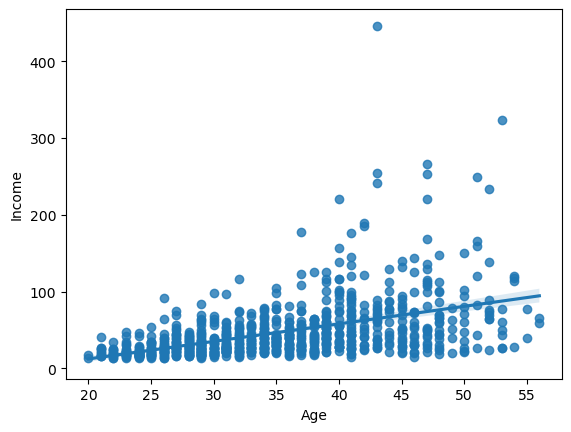

In [26]:
# Create a scatter plot of age versus income
sns.regplot(data=cust_df, x="Age", y="Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [ ]:
# Create a scatter plot of education level versus debt-to-income ratio
sns.scatterplot(data=cust_df, x="Edu", y="DebtIncomeRatio")
plt.xlabel("Education Level")
plt.ylabel("Debt-to-Income Ratio")
plt.show()

In the context of comparing mean age, education level, years employed, income, card debt, and other debt for customers who defaulted versus those who did not, the ANOVA results can be interpreted as follows:

Age: If the p-value is less than the significance level (e.g., p < 0.05), then we can conclude that there is a significant difference in mean age between the two groups.
Education level: If the p-value is less than the significance level, we can conclude that there is a significant difference in mean education level between the two groups.
Years employed: If the p-value is less than the significance level, we can conclude that there is a significant difference in mean years employed between the two groups.
Income: If the p-value is less than the significance level, we can conclude that there is a significant difference in mean income between the two groups.
Card debt: If the p-value is less than the significance level, we can conclude that there is a significant difference in mean card debt between the two groups.
Other debt: If the p-value is less than the significance level, we can conclude that there is a significant difference in mean other debt between the two groups.
If the p-value is greater than the significance level, then we cannot reject the null hypothesis and conclude that there is no significant difference between the means.

It's important to note that even if an ANOVA test shows a significant difference in means, further analysis should be conducted to determine the magnitude and direction of the effect and whether the difference is practically significant. Additionally, ANOVA assumes that the groups being compared have equal variances and normal distributions, so these assumptions should be checked before interpreting the results of the test.

In [ ]:
from scipy.stats import f_oneway

# Split the data into two groups based on whether the customer defaulted or not
defaulted = cust_df[cust_df['Defaulted'] == 1]
not_defaulted = cust_df[cust_df['Defaulted'] == 0]

# Perform the ANOVA for each variable
age_anova = f_oneway(defaulted['Age'], not_defaulted['Age'])
edu_anova = f_oneway(defaulted['Edu'], not_defaulted['Edu'])
years_employed_anova = f_oneway(defaulted['Years Employed'], not_defaulted['Years Employed'])
income_anova = f_oneway(defaulted['Income'], not_defaulted['Income'])
card_debt_anova = f_oneway(defaulted['Card Debt'], not_defaulted['Card Debt'])
other_debt_anova = f_oneway(defaulted['Other Debt'], not_defaulted['Other Debt'])

# Print the ANOVA results for each variable
print("Age ANOVA results: ", age_anova)
print("Education level ANOVA results: ", edu_anova)
print("Years employed ANOVA results: ", years_employed_anova)
print("Income ANOVA results: ", income_anova)
print("Card debt ANOVA results: ", card_debt_anova)
print("Other debt ANOVA results: ", other_debt_anova)

In [27]:
cust_df.drop('Address', axis=1, inplace=True)

cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Total Debt
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1.197
1,2,47,1,26,100,4.582,8.218,0.0,12.8,12.800
2,3,33,2,10,57,6.111,5.802,1.0,20.9,11.913
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1.197
4,5,47,1,31,253,9.308,8.908,0.0,7.2,18.216


In [28]:
X = cust_df.values[:,1:]
X = np.nan_to_num(X)
# X = StandardScaler().fit_transform(cust_data)

Here, `wcss` stands for Within-Cluster-Sum-of-Squares and `X` is your dataset.

The elbow method is used to determine the optimal number of clusters in a dataset. It works by plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

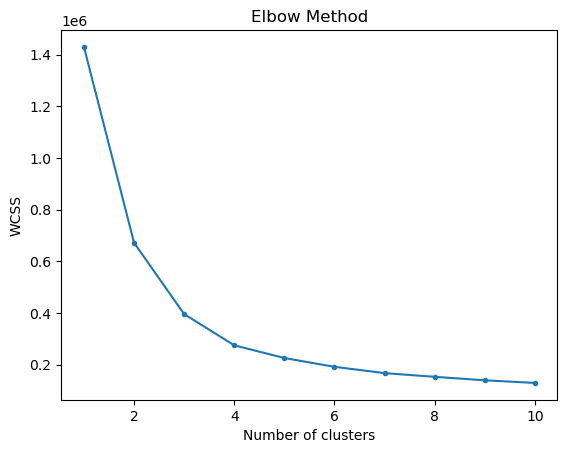

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='.')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
num_clusters = 4
k_means = KMeans(init = "k-means++", n_clusters = num_clusters, n_init = 15)
k_means.fit(X)
labels = k_means.labels_
labels_str = [f"{labels[idx]}: {cust_df.iloc[idx].values}" for idx in range(len(labels))]

In [31]:
cust_df["Cust_Cluster"] = labels
cust_df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Total Debt,Cust_Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1.197,3
1,2,47,1,26,100,4.582,8.218,0.0,12.8,12.800,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,11.913,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1.197,3
4,5,47,1,31,253,9.308,8.908,0.0,7.2,18.216,1


In [32]:
cust_df.groupby('Cust_Cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Total Debt
Cust_Cluster,,,,,,,,,,
0,414.084821,39.589286,1.812500,12.781250,61.504464,2.294147,4.292973,0.205405,10.724554,6.587121
1,453.500000,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000,21.259200
2,398.430769,43.353846,2.169231,19.153846,120.984615,3.807677,7.580246,0.140000,9.507692,11.387923
3,432.825771,31.983666,1.604356,5.373866,27.811252,0.907566,1.867265,0.294760,10.060799,2.774831


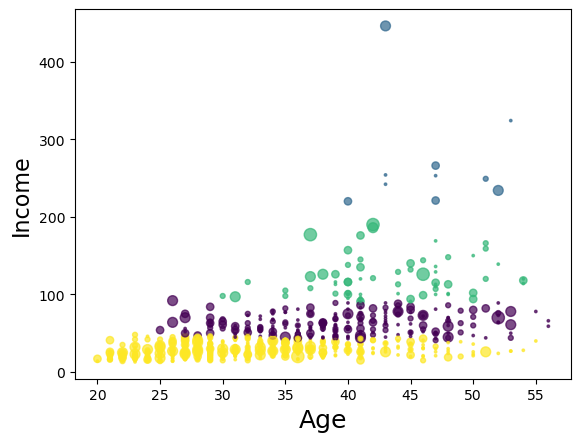

In [33]:
area = np.pi * (X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.7)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

In [ ]:
'''
Visualize data on TensorBoard

import torch
from torch.utils.tensorboard import SummaryWriter

# Create a SummaryWriter object that will write data to a log directory
writer = SummaryWriter(log_dir="kmeans")

# Write the high-dimensional data as embeddings to TensorBoard using the writer object
writer.add_embedding(torch.from_numpy(X), metadata=labels_str, tag="data")

# Close the writer object
writer.close()
'''